In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# linear Regression

# y = wx+b
weight = 0.7
bias = 0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

In [9]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [14]:
len(X), len(y)

(50, 50)

In [38]:
X_train,y_train = (X[:int(0.8 * len(X))], (y[:int(0.8 * len(y))]))
X_test,y_test = (X[int(0.8 * len(X)):], (y[int(0.8 * len(y)):]))


In [39]:
len(X_train), len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(
    x_train=X_train,
    y_train = y_train,
    x_test = X_test,
    y_test =y_test,
    prediction = None
):
    plt.figure(figsize=(10,7))
    plt.scatter(x_train,y_train,c="g",s=10,label="Training Data")
    # test data
    plt.scatter(x_test,y_test,c="b",s=5,label="Test Data")
    # plt.scatter(x_train,y_train)
    
    if prediction is not None:
        plt.scatter(x_test,prediction,c="y",s=5,label="Prediction Data")
        
    plt.legend()
    plt.show()

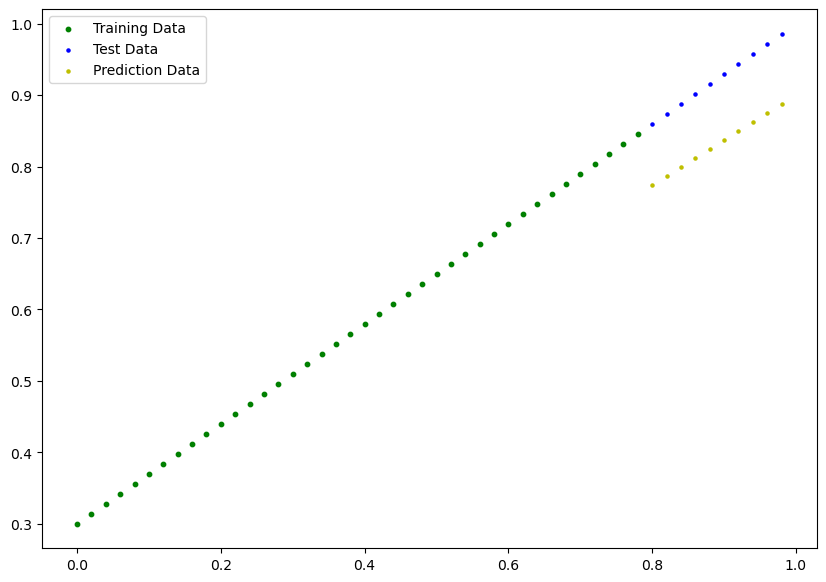

In [85]:
plot_predictions(prediction =y_test* 0.9 )

## Creating Models

To define a neural network in PyTorch, we create a class that inherits from nn.Module. 
We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. 

#### nn.Module 

nn.Module is base class for all neural network modules.
Your models should also subclass this class.


In [154]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
    def forward(self,x):
        return self.weight * x + self.bias
        

In [277]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

print(f"Using {device} device")

torch.manual_seed(42)
model_0 = LinearRegression().to(device)
print(model_0)
list(model_0.parameters())

Using cpu device
LinearRegression()


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [164]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Required_Grad 
Context-manager that disables gradient calculation.

Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward(). 

It will reduce memory consumption for computations that would otherwise have requires_grad=True.
    
    >>> x = torch.tensor([1.], requires_grad=True)

    >>> with torch.no_grad():
    ...     y = x * 2
    >>> y.requires_grad
    False


    >>> @torch.no_grad()
    ... def doubler(x):
    ...     return x * 2
    >>> z = doubler(x)
    >>> z.requires_grad
    False


    >>> @torch.no_grad()
    ... def tripler(x):
    ...     return x * 3
    >>> z = tripler(x)
    >>> z.requires_grad
    False


    >>> # factory function exception
    >>> with torch.no_grad():
    ...     a = torch.nn.Parameter(torch.rand(10))
    >>> a.requires_grad
    True

In [338]:
x = torch.tensor(4.9,requires_grad=True)
print(x.requires_grad)

with torch.inference_mode():
    y = x+1
print(x.requires_grad)
print(y.requires_grad)

True
True
False


In [ ]:
# Compute prediction error
# we know that we dont need the gradient descent to compute this time so we disable it by using no_grad
with torch.no_grad():
    pred = model_0(X_test)
    
pred
# mean absolute error aslo know as l1loss in torch
nn.L1Loss()(pred,y_test)


tensor(0.4945)

In [ ]:
# Optimizing the Model Paramet ers

# to train a model we need a loss function and optimizer
# loss function: loss function or cost function is used to measure how wrong our model predict the data
# optimizers are used to update the parameters of the model using gradient decenct to make them generalize for the data

loss_fun = nn.L1Loss()
# output = loss_fn(input, target)


In [ ]:
with torch.no